# Linear Regression
<li>Linear regression is a statistical practice of calculating a straight line that specifies a mathematical relationship between two variables.</li>
<li>Linear regression analysis is used to predict the value of a variable based on the value of another variable.</li>
<li>The variable you want to predict is called the dependent variable.</li>
<li>The variable you are using to predict the other variable's value is called the independent variable.</li>

<ol>
    <li>Simple Linear Regression</li>
    <li>Multiple Linear Regression</li>
</ol>

## 1. Simple Linear Regression
<li>Simple linear regression is a regression model that estimates the relationship between one independent and one dependent variable using a straight line.</li>
<li>Both variables should be quantitative.</li>

<li>The following equation is the general form of the simple linear regression model.</li>
<code>
    ^
    y =B0 + B1x1 
</code>
Where    
^
y represents the predicted value, 
x1 represents the feature column we choose to use in our model.
<li>These values are independent of the dataset.</li>
<li>On the other hand, B0 and B1 represent the parameter values that are specific to the dataset.</li>
<li>The goal of simple linear regression is to find the optimal B0 and B1 values that best describe the relationship between the feature and the target column.</li>


<li>The following diagram shows different simple linear regression models depending on the data:</li>

![](images/regression_figure.png)

<li>The first step is to select the feature x1, we want to use in our model.</li>
<li>Once we select this feature, we can use scikit-learn to determine the optimal parameter values B0 and B1 based on the training data.</li>


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
df = pd.read_csv('csv_data/advertising.csv')
print(df.shape)

(200, 4)


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


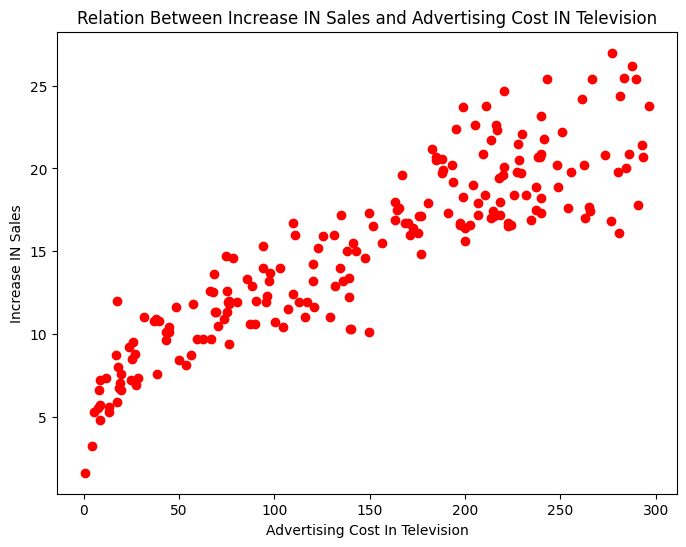

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(x=df['TV'], y=df['Sales'], color='red')
plt.xlabel('Advertising Cost In Television')
plt.ylabel('Increase IN Sales')
plt.title('Relation Between Increase IN Sales and Advertising Cost IN Television')
plt.show()

### Data Preparation

In [17]:
ind_feature = df[['TV']]
dep_feature = df['Sales']

In [18]:
print(ind_feature.shape)
print(dep_feature.shape)

(200, 1)
(200,)


### Data Splitting

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(ind_feature,
                                                   dep_feature,
                                                    test_size=0.2,
                                                    random_state=42
                                                   )

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(x_train, y_train)

LinearRegression()

In [25]:
lr.coef_

array([0.05548294])

In [26]:
lr.intercept_

7.007108428241848

In [27]:
y_hat = lr.predict(x_test)

In [28]:
print(y_hat)

[16.06747317 17.84847567 23.25806271  7.65625887 19.23000098 11.17387752
 19.03581067  9.78125562 19.34651516 16.72217191  8.75482116 10.12524988
 20.01785878  7.30671633 14.74697911 16.45030549  7.41213392 17.97053815
 11.18497411 20.17875932 19.74044406 10.76885203  9.1154603  20.92777906
 10.83543156  9.97544593 18.85271696 14.73588252 11.84522114  7.47316516
 18.09260063 10.84652815 18.04266598  7.94477018 22.58117079 20.22314567
  9.68693462 22.19279018 13.50970946  8.53288939]


In [30]:
mean_squared_error(y_test, y_hat)

6.101072906773963

In [31]:
mean_absolute_error(y_test, y_hat)

1.9502948931650088

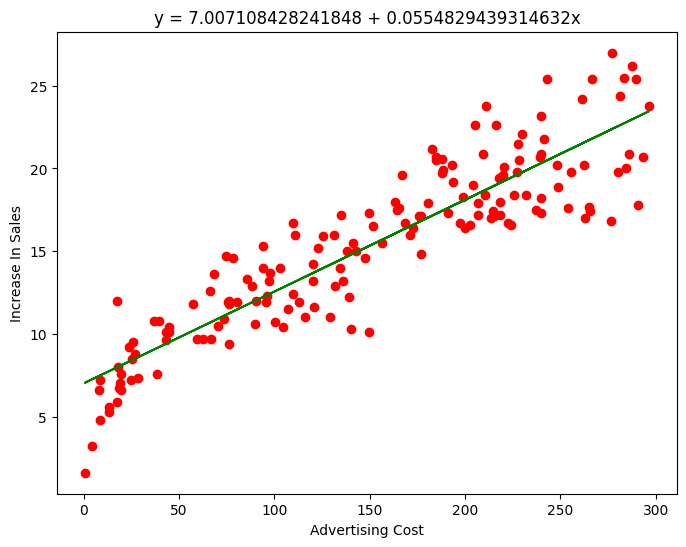

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(x = x_train, y= y_train, color = 'red')
plt.plot(x_train,lr.predict(x_train), color='green')
plt.title("y = {} + {}x".format(lr.intercept_, lr.coef_[0]))
plt.xlabel('Advertising Cost')
plt.ylabel("Increase In Sales")
plt.show()

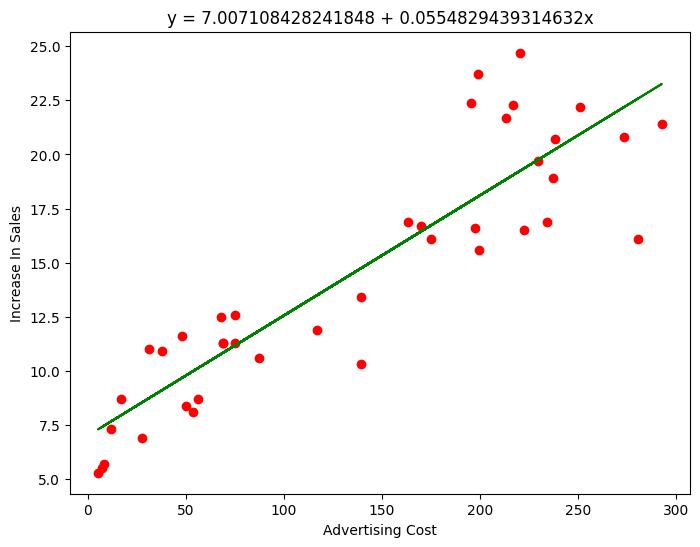

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(x = x_test, y= y_test, color = 'red')
plt.plot(x_test,y_hat, color='green')
plt.title("y = {} + {}x".format(lr.intercept_, lr.coef_[0]))
plt.xlabel('Advertising Cost')
plt.ylabel("Increase In Sales")
plt.show()

## Cost/Loss Function For Linear Regression

<li>Cost function measures the performance of a machine learning model for a data set.</li>
<li>Cost function quantifies the error between predicted and expected values and presents that error in the form of a single real number.</li>
<li>Depending on the problem, cost function can be formed in many different ways.</li>
<li>The purpose of cost function is to be either minimized or maximized.</li>
<li>For algorithms relying on gradient descent to optimize model parameters, every function has to be differentiable.</li>

![](images/cost_function.png)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
def adjr2(actual, predicted,n, d):
    """ R2 Score """
    return 1-(1-r2_score(actual,predicted))* (n-1)/(n-d-1)

### Optimization (Using Gradient Descent)
<li>Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.</li>

![](images/gradient_descent.jpg)


#### Steps For Finding Gradient Descent

![](images/gradient_descent_steps.png)

## Multiple Linear Regression

<li>A multiple linear regression model allows us to capture the relationship between multiple feature columns and the target column.</li>
<li>Here's what the formula looks like:
<code>
^
y = B0 + B1x1 + B2x2 + ... + Bnxn
</code>
      ^
<li>Where y represents the predicted value</li>
<li>B0, B1, B2,..., Bn represents n parameter values that are specific to the dataset.</li>
<li>The goal here is to find out the optimal values of B0, B1, B2 such that these features best represents the relationship between the data.</li>

![](images/multiple_linear_regression.png)

<li>The parameters values can be estimated using the following eqns:</li>

![](images/mle_eqn.png)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('csv_data/advertising.csv')
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Data Preparation

In [3]:
data = df.drop('Sales', axis=1)
labels = df['Sales']

In [6]:
print(data.shape)
print(labels.shape)

(200, 3)
(200,)


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, 
                                                   random_state = 42)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr  = LinearRegression()

In [15]:
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
lr.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [17]:
lr.intercept_

4.714126402214129

In [18]:
predictions = lr.predict(x_test)

In [19]:
predictions


array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
mean_squared_error(y_test, predictions)

2.907756910271091

In [23]:
mean_absolute_error(y_test, predictions)

1.274826210954934

In [27]:
x_test['TV']

95     163.3
15     195.4
30     292.9
158     11.7
128    220.3
115     75.1
69     216.8
170     50.0
174    222.4
45     175.1
66      31.5
182     56.2
165    234.5
78       5.4
186    139.5
177    170.2
56       7.3
152    197.6
82      75.3
68     237.4
124    229.5
16      67.8
148     38.0
93     250.9
65      69.0
60      53.5
84     213.5
67     139.3
125     87.2
132      8.4
9      199.8
18      69.2
55     198.9
75      16.9
150    280.7
104    238.2
135     48.3
137    273.7
164    117.2
76      27.5
Name: TV, dtype: float64

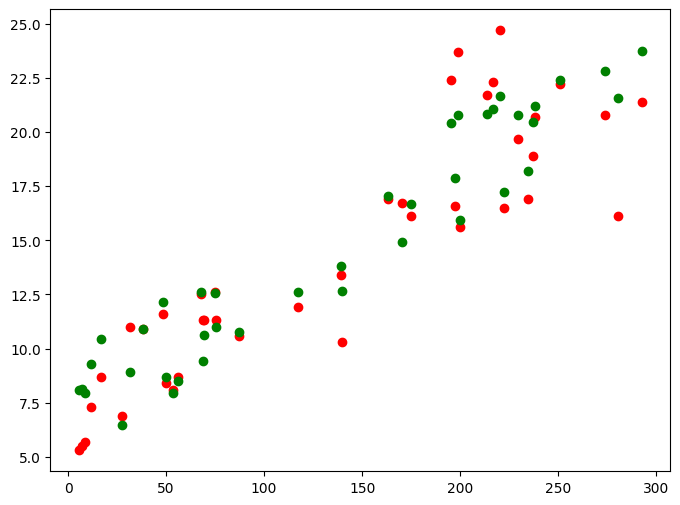

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(x_test['TV'], y_test, color='red')
plt.scatter(x_test['TV'], predictions, color='green')
plt.show()

### Performance Metrics In Linear Regression
<li>To evaluate the performance or quality of the model, different metrics are used, and these metrics are known as performance metrics or evaluation metrics.</li>
<li>Some of the performance metrics used in linear regression are:</li>
<ol>
    <b><li>Mean Absolute Error</li></b>
    <b><li>Mean Squared Error</li></b>
    <b><li>Root Mean Squared Error</li></b>
    <b><li>R²</li></b>
    <b><li>Adjuster R²</li></b>
</ol>

### Mean Absolute Error
<li>Absolute Error is the amount of error in your measurements. It is the difference between the measured value and “true” value.</li>
<li>For example, if a scale states 90 pounds but you know your true weight is 89 pounds, then the scale has an absolute error of 90 lbs – 89 lbs = 1 lbs.</li>
<li>In machine learning, mean absolute error is the average difference between the actual  values and the predicted values of the model.</li>
<li>MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.</li>
<li>The formula to calculate MAE is given by:</li>

![](images/mae.png)



### Mean Squared Error
<li>In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors.</li>
<li>The mean squared error (MSE) tells you how close a regression line is to a set of points.</li>
<li>It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.</li>
<li>The squaring is necessary to remove any negative signs. It also gives more weight to larger differences.</li>
<li>It’s called the mean squared error as you’re finding the average of a set of errors.</li>
<li>The lower the MSE, the better the forecast.</li>
<li>In machine learning, mean squared error is the average difference between the squares of actual values and the predicted values.</li>
<li>The formula to calculate mean squared error is given by:</li>

![](images/mse.png)



### Root Mean Squared Error
<li>RMSE is a quadratic scoring rule that also measures the average magnitude of the error.</li>
<li>It’s the square root of the average of squared differences between prediction and actual observation.</li>
<li>The formula to calculate RMSE is given by:</li>

![](images/rmse.png)



### R²
<li>R-Squared determines the proportion of variance in the dependent variable that can be explained by the independent variable.</li>
<li>In other words, r-squared shows how well the data fit the regression model (the goodness of fit).</li>
<li>R-squared measures the strength of the relationship between your model and the dependent variable on a scale of 0 – 1.</li>
</li>Usually, the larger the R2, the better the regression model fits your observations.</li>
<li>The formula to calculate R2 is given by:</li>

![](images/r2_score.png)

<li>But sometimes, small R-squared values are not always a problem, and high R-squared values are not necessarily good.</li>


![](images/r2_range.png)

![](images/r2_problems.png)

### Adjusted R2
<li>Adjusted R2 is a corrected goodness-of-fit (model accuracy) measure for linear models.</li>
<li>Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.</li>
<li>The adjusted R-squared increases when the new term improves the model more than would be expected by chance.</li>
<li>It decreases when a predictor improves the model by less than expected.</li>

![](images/r2_adjusted.png)

In [30]:
from sklearn.metrics import r2_score

In [20]:
def adjr2(actual, predicted,n, d):
    """ R2 Score """
    return 1-(1-r2_score(actual,predicted))* (n-1)/(n-d-1)

In [32]:
r2_score(y_test, predictions)

0.9059011844150826

In [37]:
adjr2(y_test, predictions,n=y_test.shape[0], d=x_test.shape[1])

0.8980596164496728

In [34]:
y_test.shape[0]

40

In [36]:
x_test.shape[1]

3

### Bias Variance TradeOffs In Machine Learning

![](images/bias_variance_tradeoff.png)

### Regularization In Regression

<li>During the Machine Learning model building, the Regularization Techniques is an unavoidable and important step to improve the model.</li>
<li>This is also called the Shrinkage method in which we use to add the penalty term to control the complex model to avoid overfitting by reducing the variance.</li>
<li>In regression, we can came across overfitted model where the best fit line works best for the training dataset but fails for testing datasets.</li>
<li>To prevent from such overfitting problem, we have two different methods in regression. They are :</li>
<ol>
    <b><li>Lasso Regression</li></b>
    <b><li>Ridge Regression</li></b>



### 1. Lasso Regression

<li>Lasso Regression is also called as L1 regularization technique.</li>
<li>We can use lasso regression for feature selection as well because the beta coefficients can be shrinked down to 0 incase of lasso regression.</li>
<li>In lasso regression, we add the absolute values of the regression coefficients as a penalty term to reduce overfitting.</li>
<li>The formula to calculate lasso regression is given by:</li>


![](images/lasso_regression.png)

![](images/lasso.png)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('csv_data/advertising.csv')
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data = df.drop('Sales', axis=1)
labels = df['Sales']

In [4]:
print(data.shape)
print(labels.shape)

(200, 3)
(200,)


In [5]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,
                                                   random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [8]:
from sklearn.linear_model import Lasso

In [29]:
lasso_r = Lasso(alpha=4)

In [30]:
lasso_r.fit(x_train, y_train)

Lasso(alpha=4)

In [31]:
lasso_r.coef_

array([0.05411492, 0.08501478, 0.        ])

In [32]:
# array([0.05450927, 0.10094536, 0.00433665])


In [33]:
lasso_r.intercept_

5.267572966286886

In [34]:
predictions = lasso_r.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
print("Mean squared error is {}".format(mean_squared_error(y_test, predictions)))
print("Mean Absolute error is {}".format(mean_absolute_error(y_test, predictions)))
print("Root Mean squared error is {}".format(mean_squared_error(y_test, predictions, 
                                                               squared=False)))
print("R2 score is {}".format(r2_score(y_test, predictions)))


Mean squared error is 3.074966081178691
Mean Absolute error is 1.3178889267598242
Root Mean squared error is 1.753558120273945
R2 score is 0.9004900770141292


In [37]:
adjr2(y_test, predictions,n=y_test.shape[0], d=x_test.shape[1])

0.8921975834319733

### 2. Ridge Regession

<li>Ridge Regression is also called as L2 regularization technique.</li>
<li>We can not use ridge regression for feature selection as well because the beta coefficients can only be shrinked down to lower values but not 0.</li>
<li>In ridge regression, we add the squared values of the regression coefficients as a penalty term to reduce overfitting.</li>
<li>The formula to calculate ridge regression is given by:</li>

![](images/ridge_regression.png)

![](images/ridge.png)

In [38]:
from sklearn.linear_model import Ridge

In [54]:
ridge_r = Ridge(alpha=5)

In [55]:
ridge_r.fit(x_train, y_train)

Ridge(alpha=5)

In [56]:
ridge_r.coef_

array([0.05450917, 0.10092855, 0.00434107])

In [41]:
predictions = ridge_r.predict(x_test)

In [42]:
print("Mean squared error is {}".format(mean_squared_error(y_test, predictions)))
print("Mean Absolute error is {}".format(mean_absolute_error(y_test, predictions)))
print("Root Mean squared error is {}".format(mean_squared_error(y_test, predictions,                                                                squared=False)))
print("R2 score is {}".format(r2_score(y_test, predictions)))


Mean squared error is 2.907796107367048
Mean Absolute error is 1.2748301536195636
Root Mean squared error is 1.7052261161989772
R2 score is 0.9058999159458062


In [43]:
adjr2(y_test, predictions,n=y_test.shape[0], d=x_test.shape[1])

0.8980582422746234